# 20MAI0038
# Rahul Laxman Vasanad


# 1. Load all the libraries

In [36]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


# 2. Data Loading and Exploration

In [37]:
fpath = "images/Images/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound'] 

No. of categories =  20


In [38]:
# Display the total images in the database, size of the image, no of classes in the database
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))


No. of images loaded =  3633 
No. of labels loaded =  3633
<class 'list'> <class 'list'>


In [39]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3633, 227, 227, 3) 
Labels shape =  (3633,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


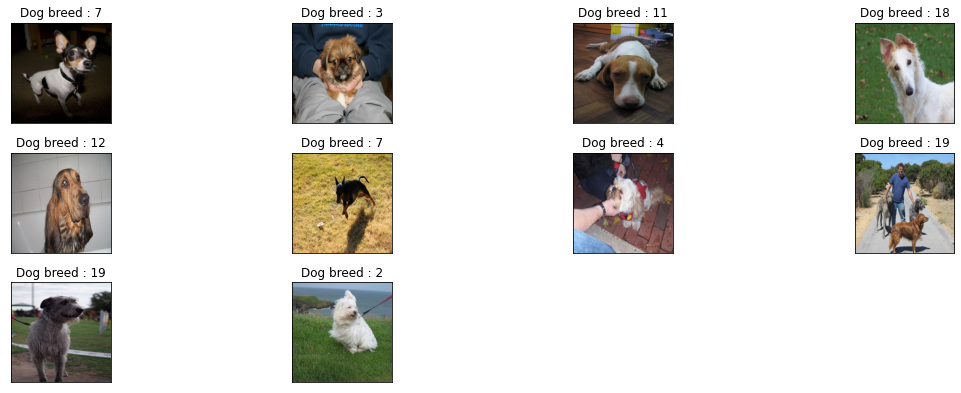

In [40]:
#Display sample input and output images (at least 10 images).
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 9))
    n = 0 
    for i in range(10):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# 3. Preparing data for training the Alexnet CNN model

In [41]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3630 3631 3632]

'n' values after shuffling =  [2178  183  184 ...  860 3507 3174]


In [42]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3633, 227, 227, 3) 
Labels shape after shuffling =  (3633,)


In [43]:
#Data Normalization
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3633, 227, 227, 3)


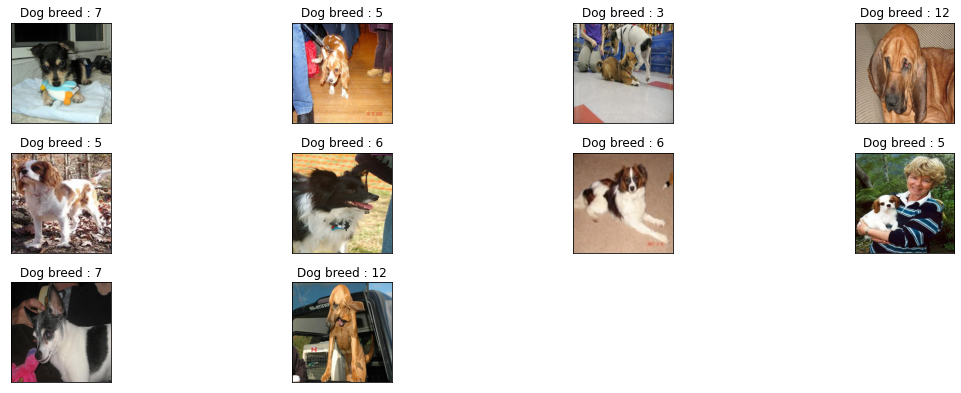

In [44]:
#Display few images after normalization
display_rand_images(images, labels)

In [45]:
#Split loaded dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2906, 227, 227, 3)
y_train shape =  (2906,)

x_test shape =  (727, 227, 227, 3)
y_test shape =  (727,)


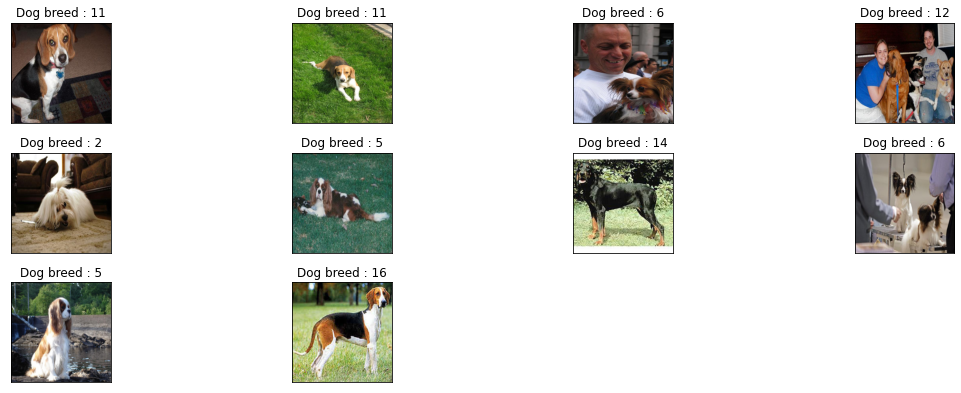

In [46]:
#Display train random images
display_rand_images(x_train, y_train)

# 4. Define Alexnet CNN model

[[[ 2.34530307e-03  2.04560068e-02 -1.04704313e-03 ...  2.21738573e-02
   -3.41136195e-03 -1.93206295e-02]
  [-5.29318489e-03  2.23294254e-02  5.48390113e-03 ...  9.37126018e-03
   -2.02575661e-02  1.02771986e-02]
  [ 7.06979632e-03  1.47246327e-02  1.85972620e-02 ... -1.39476722e-02
   -1.25688557e-02 -1.66525487e-02]
  ...
  [-4.05829959e-03  1.19816791e-02 -9.71037894e-04 ...  1.34440307e-02
   -1.53924767e-02  1.84606295e-02]
  [ 5.34801744e-03 -9.18321777e-03  1.09128263e-02 ... -1.70557965e-02
   -2.68585421e-03  5.97305596e-03]
  [ 1.85463820e-02 -8.73369724e-03 -1.45035852e-02 ...  1.22821126e-02
   -8.41021538e-03 -5.05560078e-03]]

 [[-6.51716068e-03 -1.23323705e-02  1.78220328e-02 ...  3.35154682e-03
    6.81368075e-03  1.74469110e-02]
  [-7.51197524e-03  1.54325012e-02  3.49186920e-03 ... -1.76988728e-03
   -7.66696036e-03 -1.05791576e-02]
  [ 1.61946174e-02 -1.38950553e-02  1.77476238e-02 ... -5.32969832e-03
   -2.10369769e-02  2.15715338e-02]
  ...
  [ 7.88248703e-03 -1.3

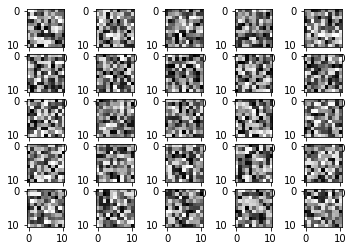

In [51]:
Alexnet=Sequential()

#1 conv layer
x=Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3))
Alexnet.add(x)

xlw = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    print(xlw)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xlw[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

#1 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#2 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#3 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())


Alexnet.add(Flatten())

#1 dense layer
Alexnet.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#2 dense layer
Alexnet.add(Dense(4096,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#3 dense layer
Alexnet.add(Dense(1000,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#output layer
Alexnet.add(Dense(20,activation="softmax"))



In [52]:
Alexnet.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 9, 9, 384)       

In [53]:
#Compile the CNN model
Alexnet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 5. Train the model

In [54]:
Alexnet.fit(x_train, y_train, epochs=10)

Epoch 1/10
91/91 [==============================] - 257s 3s/step - loss: 3.4617 - accuracy: 0.0943
Epoch 2/10
91/91 [==============================] - 249s 3s/step - loss: 3.1916 - accuracy: 0.1187
Epoch 3/10
91/91 [==============================] - 237s 3s/step - loss: 3.0258 - accuracy: 0.1504
Epoch 4/10
91/91 [==============================] - 233s 3s/step - loss: 2.9200 - accuracy: 0.1593
Epoch 5/10
91/91 [==============================] - 227s 2s/step - loss: 2.8307 - accuracy: 0.1769
Epoch 6/10
91/91 [==============================] - 243s 3s/step - loss: 2.7455 - accuracy: 0.1996
Epoch 7/10
91/91 [==============================] - 277s 3s/step - loss: 2.6387 - accuracy: 0.2164
Epoch 8/10
91/91 [==============================] - 225s 2s/step - loss: 2.6319 - accuracy: 0.2251
Epoch 9/10
91/91 [==============================] - 238s 3s/step - loss: 2.5433 - accuracy: 0.2385
Epoch 10/10
91/91 [==============================] - 367s 4s/step - loss: 2.4698 - accuracy: 0.2667


In [57]:
#Metrics to evalvuate Loss and accuracy
loss, accuracy = Alexnet.evaluate(x_test, y_test)

23/23 [==============================] - 28s 1s/step - loss: 3.4534 - accuracy: 0.1719


In [58]:
print(loss,accuracy)


3.453383207321167 0.17193947732448578


# 6. Predicted values using trained model

In [59]:
pred = model.predict(x_test)

pred.shape

(727, 20)

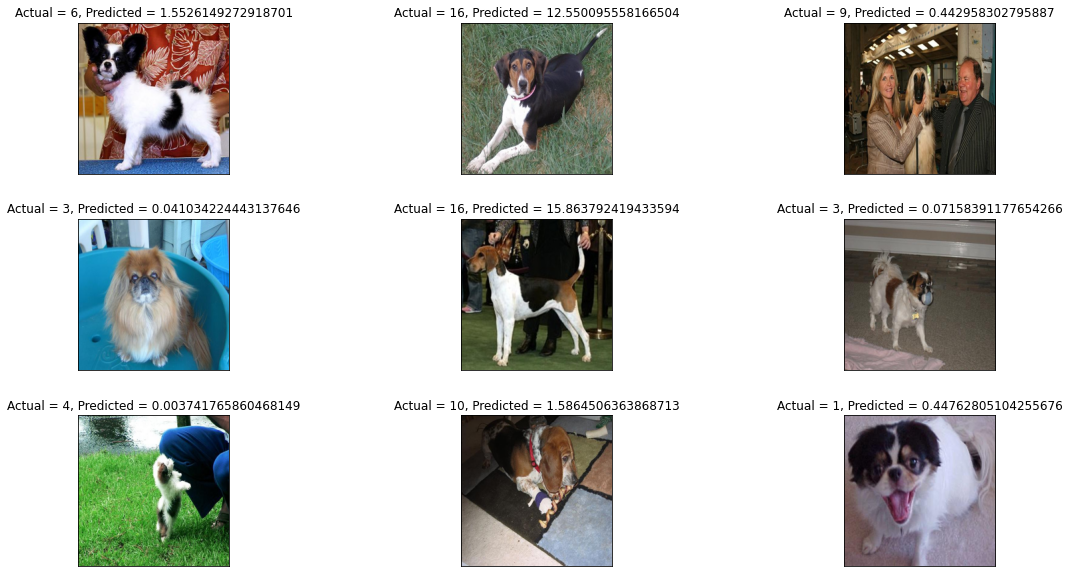

In [61]:
#Display few random images with actual vs predicted values of labels
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()